# Predicting Wine Quality Score

**Authors**: Xander Dawson, Zackarya Hamza, Sid Ahuja

In [3]:
library(tidyverse, quietly = TRUE)
library(tidymodels, quietly = TRUE)
library(repr, quietly = TRUE)
library(GGally, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(psych, quietly = TRUE)
library(kknn, quietly = TRUE)

## Summary

- Do last after discussion
- See breast cancer summary example
- Talk about the model we use (kNN) to predict wine quality using chemical compositions of the wine
- Discuss performance of final classifier
- Discuss the implications of the score --> if its' a good or bad score, how does it impact wine quality predictions in the real world
- Talk about whether the model is ready to deploy or still needs work

## Introduction

In 2009, the CVRVV ("Green Wine Region Viticulture Commission") published data on white "Vinho Verde" wines from the North of Portugal (Cortez et al., 2009). Their data concerned various physiochemical properties of these white wines, including acidity, residual sugar, chlorides (salt content), sulfur dioxide and sulphate levels (preservatives), pH, and alcohol content. The CVRVV also includes a quality ranking, indexed 0 to 10. Despite the potential for subjectivity in the grading of these wines by the CVRVV, this data offers an interesting set of characterstics, which we will use to build a predictive model, which will categorize wines as being good or bad based on their chemical properties. 

This will offer a useful insight into the nature of a quality wine, and may reveal trends amongst certain properties. For example, we could find an optimal balance of sweet (residual sugar) and savoury (chlorides) characteristics for certain wines. We may find trends between quality, and the presence of preservatives (sulphates and sulfides). We begin this analysis with a qualitative exploration of our variables, through which we will select the most impactful variables to analyze using our model.

- Open paragraph by talking about what we are doing in this report --> our goal is to use a classification model to predict wine quality based on several chemical measurements of the wine
- We are focusing on white wines in this report
- This has many implications in wine making and in the wine business where it is important to make good quality wine by understanding which additives and wine properties increase quality
- Additionally, wine buyers can use this model to buy good quality wines without having to try every single wine prior to purchasing (idk feel free to add any BS here)
- others can also input there own quality scores to get personalized models
- See breast cancer intro for more ideas

## Methods and Results

### Data

In order to explore and build a wine quality classification model, we are using the wine quality data set sourced from the UCI Machine Learning Repository and created by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis from the University of Minho in Portugal (Cortez et al., 2009). Specifically, we are interested in predicting white wine quality based on the chemical composition of the wine. Each row represents a white wine and the chemical measurements taken from the wine and there are 4898 samples in the dataset. The target value (integer wine quality score) was determined by the Vinho Verde Wine Commission (CVRVV) of Portugal.

| Feature | Type | Description|
|:---:|:---:|:---:|
| Fixed Acitity | Coninuous | Concentration (g/L) of tartaric acid.<br />Impacts the tartness of wines. |
| Volatile Acitity | Coninuous | Concentration (g/L) of acetic acid.<br />Impacts the vinegar-like taste in wines. |
| Citric Acid | Coninuous | Concentration (g/L) of citric acid.<br />Impacts the freshness of wines. |
| Residual Sugar | Coninuous | Concentration (g/L) of sugar remaining after fermentation.<br />Impacts the sweetness of wines. |
| Chlorides | Coninuous | Concentration (g/L) of chlorides.<br />Impacts the saltiness of wines. |
| Free Sulfur Dioxide | Coninuous | Concentration (mg/L) of unbound SO2.<br />Prevents microbial growth. |
| Total Sulfur Dioxide | Coninuous | Concentration (mg/L) of total SO2.<br />Prevents microbial growth and impacts aroma/taste. |
| Density | Coninuous | Density (g/mL) measurement.<br />Relates alcohol to sugar content. |
| pH | Coninuous | Measurement of wine acidity. | 
| Suphates | Coninuous | Concentration (mg/L) of total sulphates. |
| Alcohol | Coninuous | Percentage (%) of alcohol content. |

### Analysis

To predict the wine quality, we utilized the k-nearest neighbors (k-nn) algorithm and built a classification model based on certain features within the dataset (excluding **ADD FEATURES WE DID NOT USE**). First we converted the quality_score target column into a quality_class column where scores 0-5 were considered bad and scores 6-10 were considered good. We did this to reduce the number of target classes, allowing for more examples within each class. Then we split the data into train (70%) and test splits (30%). All selected features were scaled prior to model training. `[*** insert cross-validation and hyperparameter tuning information here]`. The R programming language (R Core Team, 2023) and the tidyverse(Wickham et al., 2019) and tidymodels(Kuhn et al., 2020) R packages were used to perform the analysis

In [4]:
# data downloaded as zip from UCI Machine Learning Repository and unzipped file is moved to /data
url <- "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
temp <- tempfile()
download.file(url, temp)
unzip(temp, exdir = "./data/raw")

In [5]:
# preprocessing data
# read csv file and replace column header
white_wine <- read_delim("data/raw/winequality-white.csv", delim = ";", show_col_types = FALSE)
colnames(white_wine) <- c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
                          "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", 
                          "pH", "sulphates", "alcohol", "quality_score")

# changing quality_score to quality_category
white_wine <- white_wine %>% 
    mutate(quality_category = case_when(
        quality_score <= 5 ~ "bad",
        quality_score <= 10 ~ "good")) %>%
    mutate(quality_category = as_factor(quality_category)) %>%
    select(-quality_score)

head(white_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_category
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,good
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,good
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,good
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,good
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,good
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,good


In [37]:
# creating the train, test and cross-validation splits
set.seed(321)
wine_split <- initial_split(white_wine, prop = 0.70, strata = quality_category)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

write_csv(wine_train, "data/processed/white_wine_train.csv")
write_csv(wine_test, "data/processed/white_wine_test.csv")

In [38]:
# feature scaling recipe to generate scaled csv files
wine_preprocess_recipe <- recipe(quality_category ~ ., data = wine_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

prep_preprocess_recipe <- prep(wine_preprocess_recipe, training = wine_train)

scaled_wine_train <- bake(prep_preprocess_recipe, new_data = wine_train)
scaled_wine_test <- bake(prep_preprocess_recipe, new_data = wine_test)

write_csv(scaled_wine_train, "data/processed/scaled_white_wine_train.csv")
write_csv(scaled_wine_test, "data/processed/scaled_white_wine_test.csv")

In [39]:
# summary statistics of the training data (no scaling)
describe(wine_train) %>%
    select(n, mean, sd, median, min, max, range)

,n,mean,sd,median,min,max,range
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed_acidity,3428,6.86471704,0.835011349,6.8000,3.90000,14.20000,10.30000
volatile_acidity,3428,0.27729434,0.099621665,0.2600,0.08000,0.96500,0.88500
citric_acid,3428,0.33271004,0.117602650,0.3100,0.00000,1.00000,1.00000
residual_sugar,3428,6.41130397,5.087360092,5.3000,0.60000,65.80000,65.20000
chlorides,3428,0.04576109,0.021934202,0.0430,0.00900,0.34600,0.33700
free_sulfur_dioxide,3428,35.33270128,17.084649991,34.0000,2.00000,289.00000,287.00000
total_sulfur_dioxide,3428,138.04390315,42.261806615,134.0000,9.00000,440.00000,431.00000
density,3428,0.99407241,0.002995928,0.9938,0.98713,1.03898,0.05185
pH,3428,3.18758751,0.150233889,3.1800,2.74000,3.81000,1.07000


Add observation

In [40]:
# summary statistics of each feature for both classes
num_obs <- nrow(wine_train)
summary <- wine_train %>%
        group_by(quality_category) %>%
        summarize(
            count = n(),
            percentage = n() / num_obs * 100,
            fixed_acidity_avg = mean(fixed_acidity),
            volatile_acidity_avg = mean(volatile_acidity),
            citric_acid_avg = mean(citric_acid),
            residual_sugar_avg = mean(residual_sugar),
            chlorides_avg = mean(chlorides),
            free_sulfur_dioxide_avg = mean(free_sulfur_dioxide),
            total_sulfur_dioxide_avg = mean(total_sulfur_dioxide),
            density_avg = mean(density),
            pH_avg = mean(pH),
            sulphates_avg = mean(sulphates),
            alcohol_avg = mean(alcohol)
        )
summary

quality_category,count,percentage,fixed_acidity_avg,volatile_acidity_avg,citric_acid_avg,residual_sugar_avg,chlorides_avg,free_sulfur_dioxide_avg,total_sulfur_dioxide_avg,density_avg,pH_avg,sulphates_avg,alcohol_avg
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
good,2280,66.51109,6.804452,0.2618004,0.3322237,6.166338,0.04333070,35.52478,133.6243,0.9935585,3.198526,0.4925482,10.804820
bad,1148,33.48891,6.984408,0.3080662,0.3336760,6.897822,0.05058798,34.95122,146.8214,0.9950931,3.165862,0.4818554,9.859117


Add observation

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


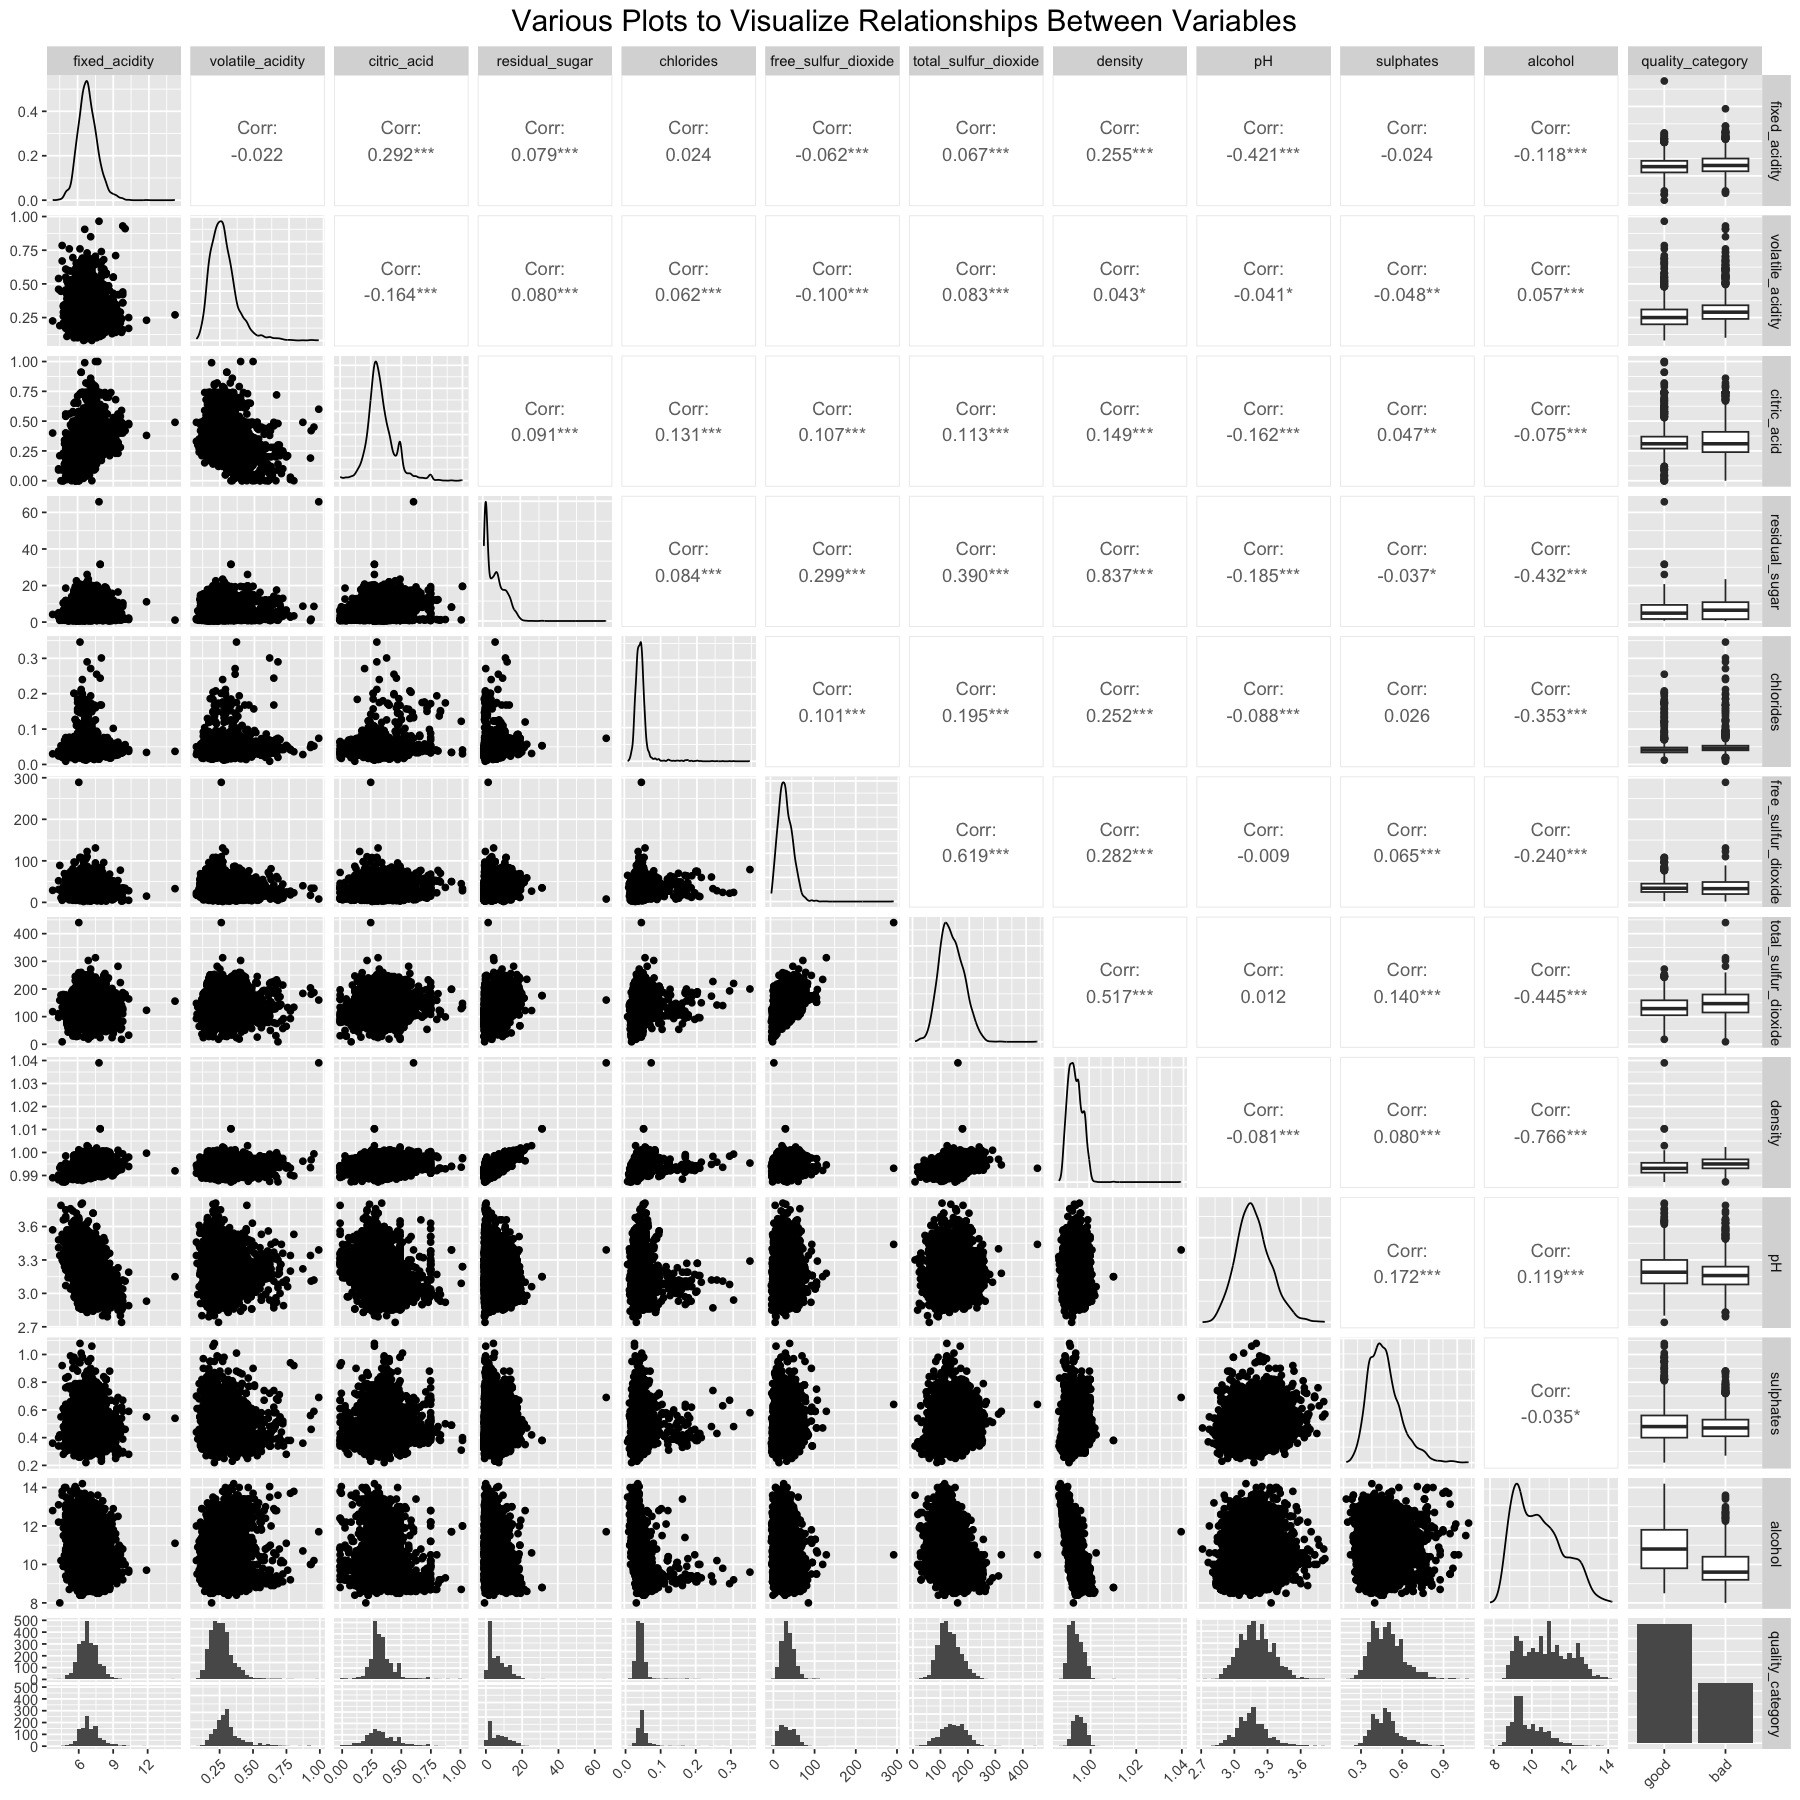

In [41]:
# checking for any highly correlated features
options(plot.width=15, plot.height=15)

plot <- wine_train %>%
        ggpairs() +
        theme(axis.text.x=element_text(angle = 45, hjust = 1)) +
        ggtitle("Various Plots to Visualize Relationships Between Variables") +
        theme(plot.title = element_text(size = 18, hjust = 0.5))
plot

Add observation

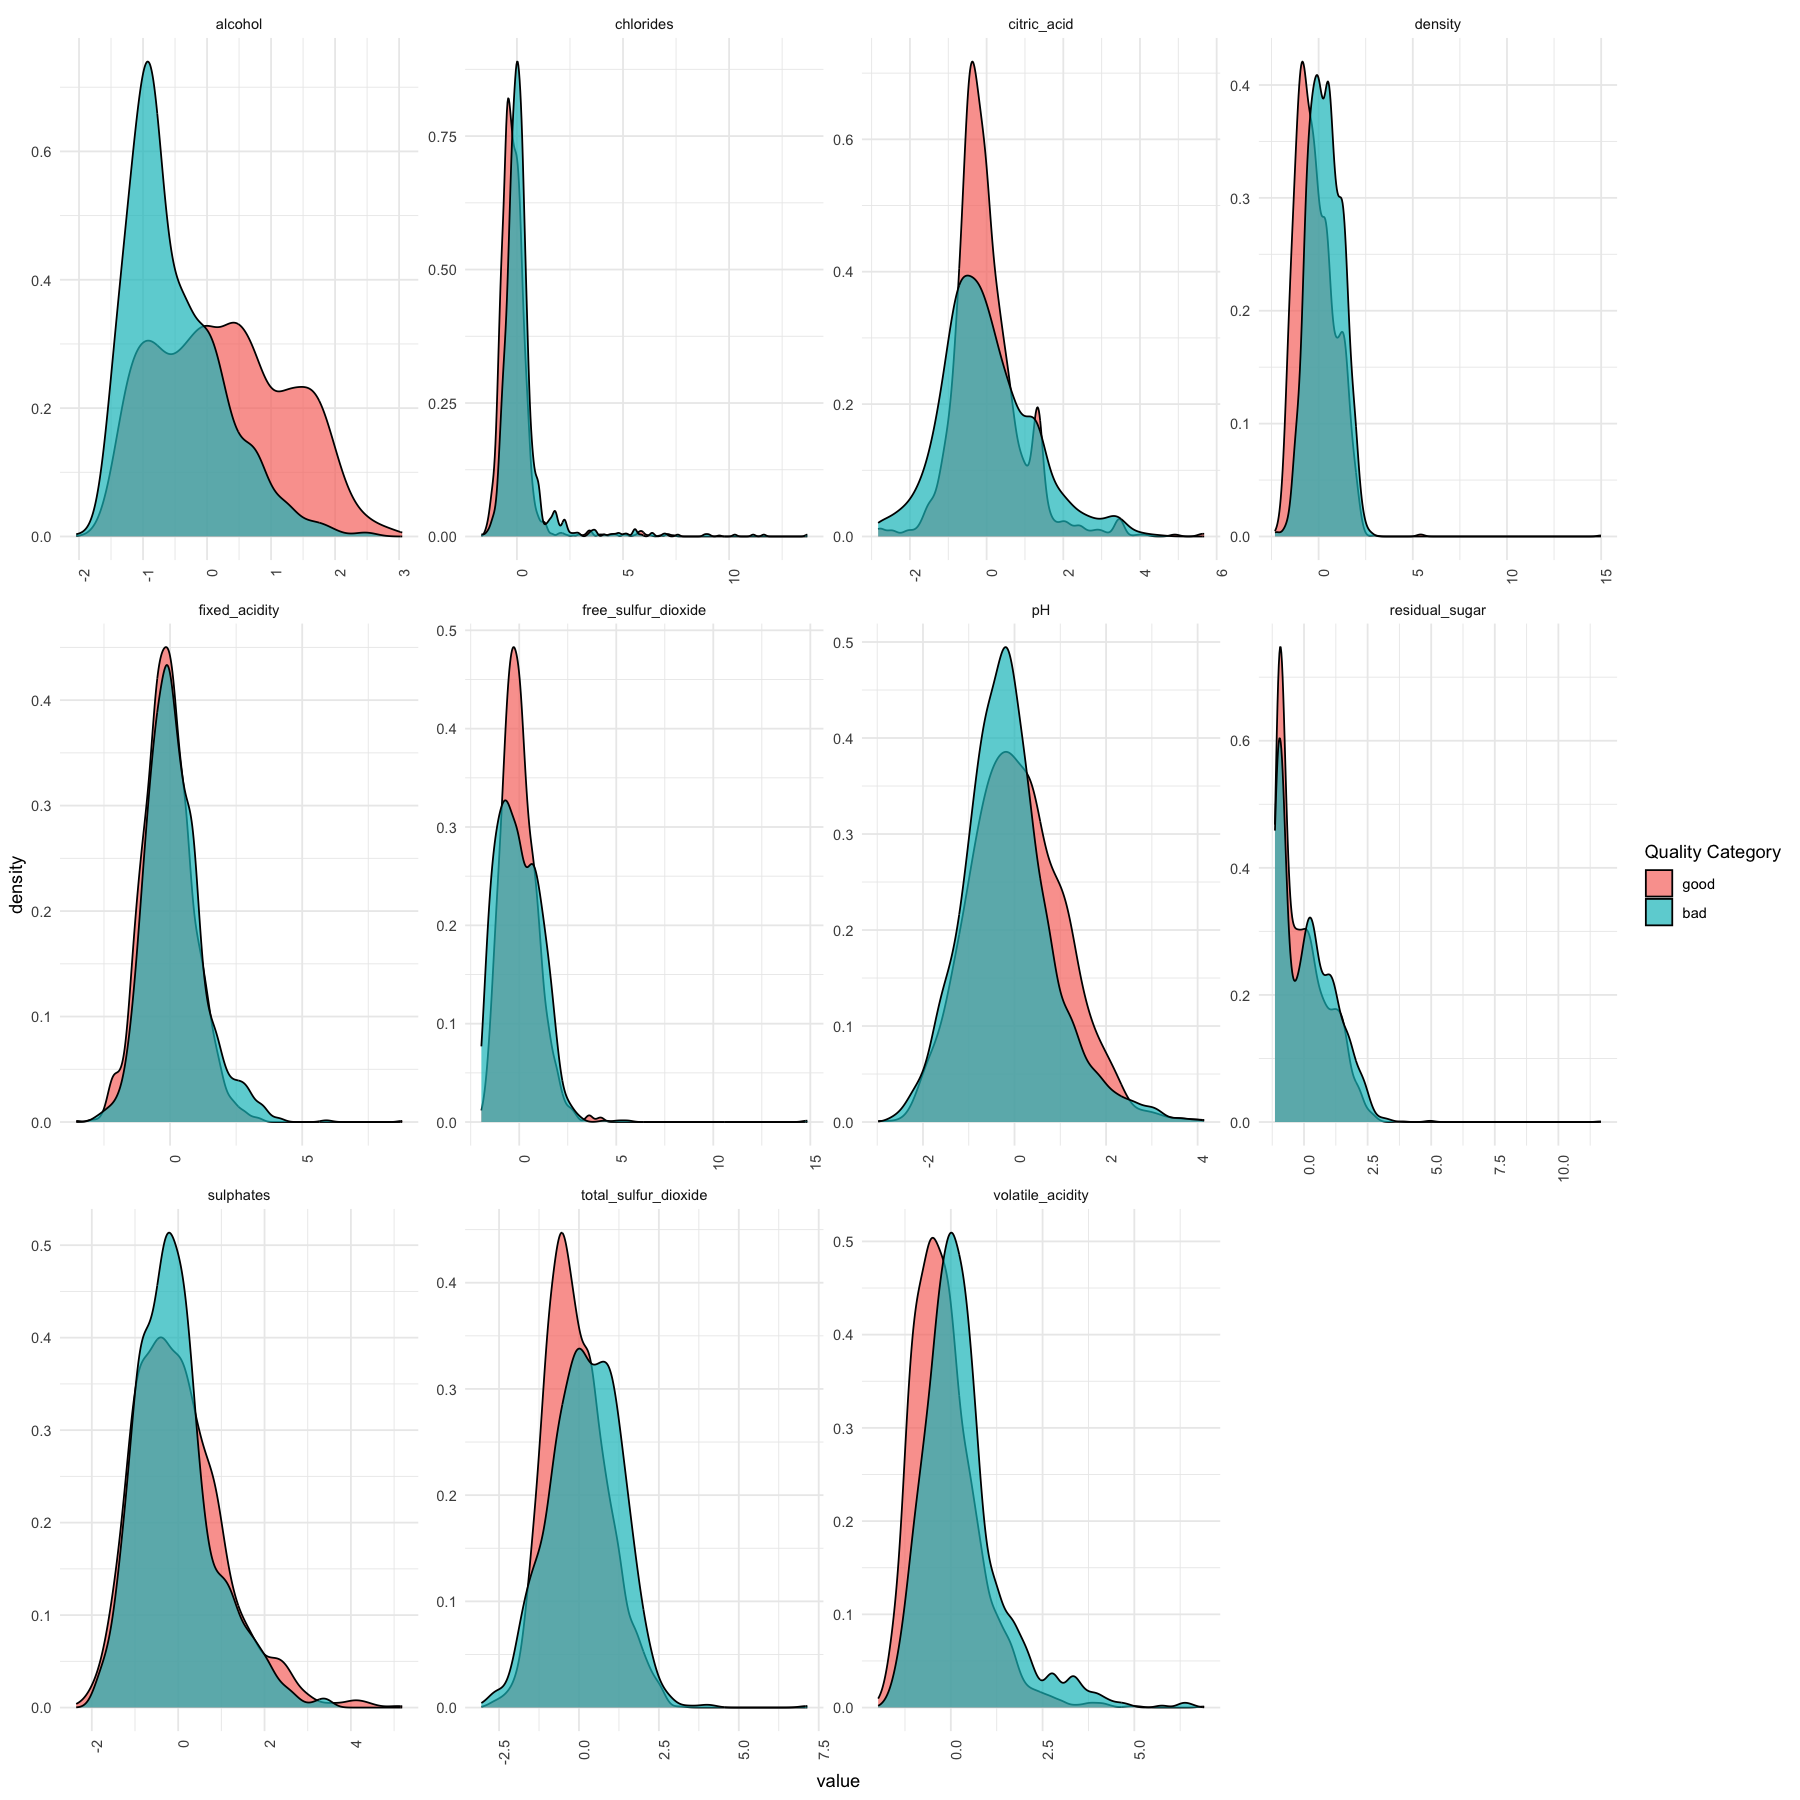

In [42]:
# feature selection - looking for features with distinct distributions
scaled_wine_train_long <- scaled_wine_train %>%
                gather(key = "predictor", value = "value", -quality_category)

ggplot(scaled_wine_train_long, aes(x = value, fill = quality_category)) +
    geom_density(alpha = 0.7) +
    facet_wrap(~predictor, scales = "free") +
    theme_minimal() +
    labs(fill = "Quality Category") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

Add observation

In [112]:
# hyperparameter optimization - choosing k
set.seed(654)
wine_recipe <- recipe(quality_category ~ alcohol + volatile_acidity + 
                      total_sulfur_dioxide + density + chlorides + residual_sugar,
                      data = wine_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

wine_vfold <- vfold_cv(wine_train, v = 10, strata = quality_category)

In [113]:
knn_spec <- nearest_neighbor(weight_func = "optimal",
                             neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

In [116]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() %>%
            add_recipe(wine_recipe) %>%
            add_model(knn_spec) %>%
            tune_grid(resamples = wine_vfold, grid = k_vals) %>%
            collect_metrics()

accuracies <- knn_results %>%
            filter(.metric == "accuracy")

head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7710117,10,0.006437294,Preprocessor1_Model01
6,accuracy,binary,0.7678098,10,0.006442345,Preprocessor1_Model02
11,accuracy,binary,0.7683921,10,0.005156178,Preprocessor1_Model03
16,accuracy,binary,0.7689777,10,0.005547091,Preprocessor1_Model04
21,accuracy,binary,0.7730628,10,0.005595821,Preprocessor1_Model05
26,accuracy,binary,0.7707304,10,0.006113203,Preprocessor1_Model06


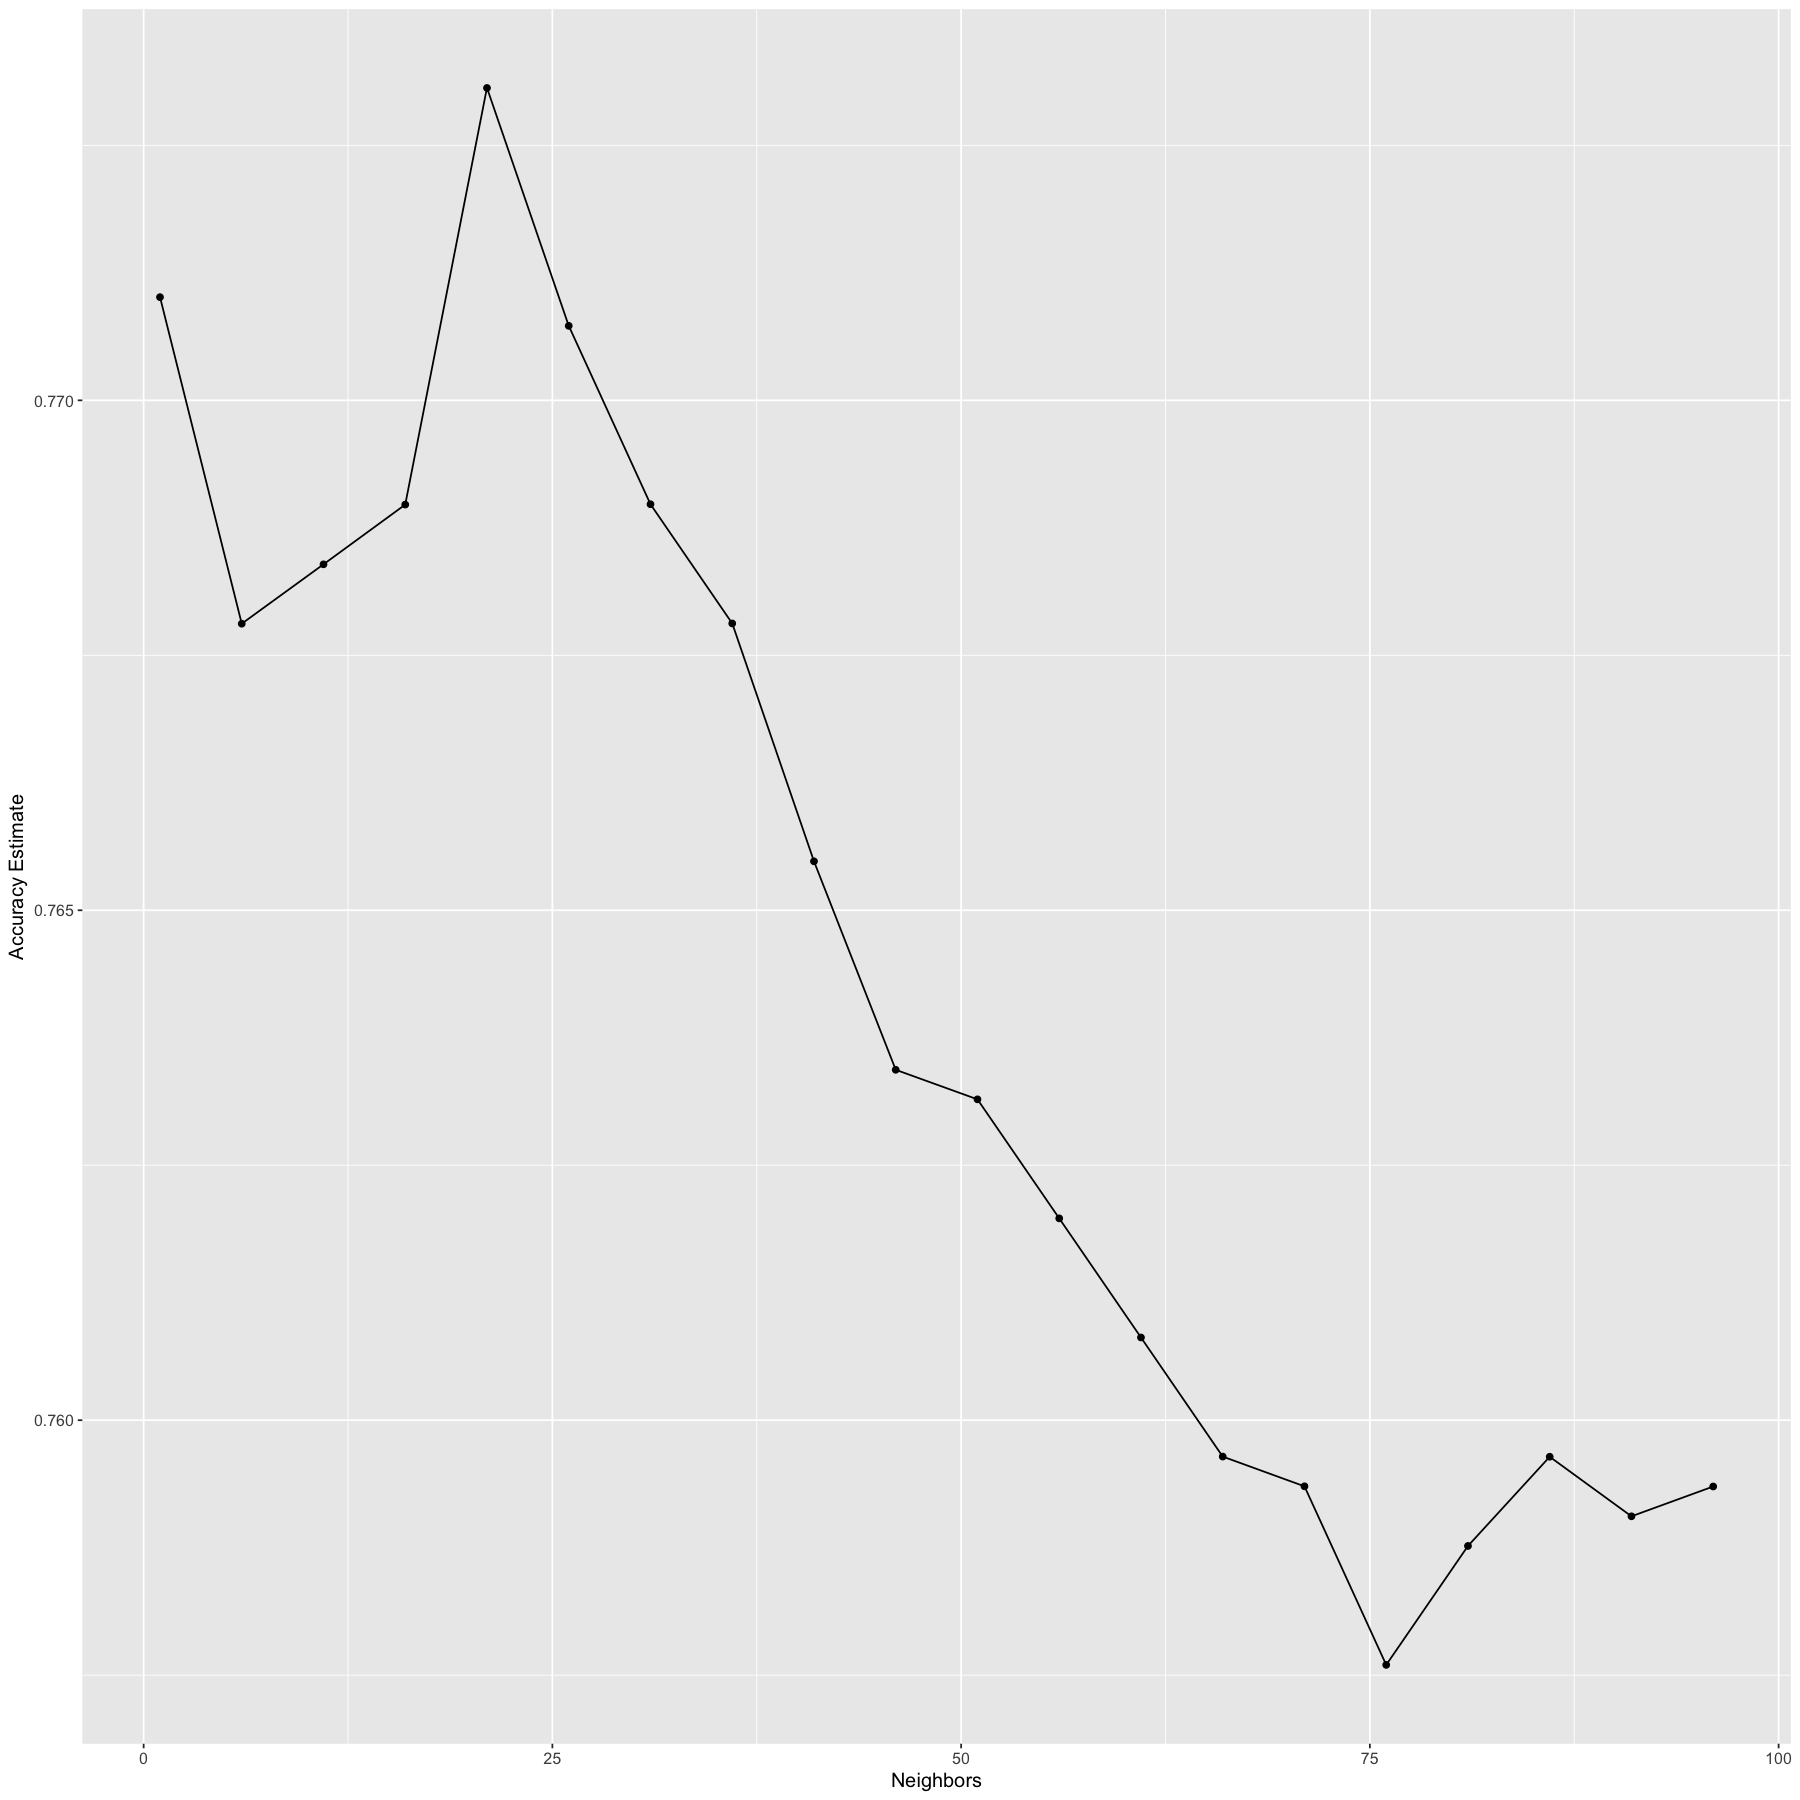

In [117]:
accuracies_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors", y = "Accuracy Estimate") +
                theme(text = element_text(size = 12))

accuracies_vs_k

Add observation

In [120]:
# selecting best k value
best_k <- accuracies %>%
        arrange(desc(mean)) %>%
        head(1) %>%
        pull(neighbors)
best_k

[1] 21

In [123]:
# building classification model using best k value
wine_recipe <- recipe(quality_category ~ alcohol + chlorides + volatile_acidity + 
                      total_sulfur_dioxide + density ,
                      data = wine_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "optimal",
                             neighbors = best_k) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_fit <- workflow() %>%
    add_recipe(wine_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = wine_train)

In [124]:
# evaluating on test set
wine_test_predictions <- predict(knn_fit, wine_test) %>%
    bind_cols(wine_test)

wine_test_predictions %>%
    metrics(truth = quality_category, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

wine_test_predictions %>%
    precision(truth = quality_category, estimate = .pred_class, event_level="first")

wine_test_predictions %>%
    recall(truth = quality_category, estimate = .pred_class, event_level="first")

confusion <- wine_test_predictions %>%
             conf_mat(truth = quality_category, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7734694


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7918552


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.894683


          Truth
Prediction good bad
      good  875 230
      bad   103 262

Add observation

## Discussion

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## References

blank